In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler


import statsmodels.api as sm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Import Data

## 1.1 Control Variables

In [3]:
def ConvertConVarTab(df, value_col_name):
  df = pd.melt(df, id_vars = ['Country Name'], value_vars = [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,  2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], var_name = 'year', value_name = value_col_name)
  return df

ConVarTabs = ['GDPGR', 'GDPPC' , 'IFR' , 'IR', 'XM' , 'M2R', 'CPGDP', 'CG', 'CPG', 'CPI']

ConVar = pd.DataFrame()

for i in range(len(ConVarTabs)):
  df = pd.read_excel('/content/drive/MyDrive/Capital Controls and Banking Crises/Control Variables.xlsx', ConVarTabs[i])
  df = ConvertConVarTab(df, ConVarTabs[i])
  if i == 0:
    ConVar = df
  else:
    ConVar = pd.concat([ConVar, df.iloc[:,2]], axis=1)


In [4]:
ConVar

,Country Name,year,GDPGR,GDPPC,IFR,IR,XM,M2R,CPGDP,CG,CPG,CPI
0,Argentina,1995,-2.845210,10003.091689,0.036091,14.230000,-1.983460,3.252356,19.679623,-0.319970,NaN,38.801600
1,Brazil,1995,4.223794,6584.739221,0.660070,41.200000,-2.357366,4.815316,43.036729,-21.709275,NaN,36.640316
2,Bulgaria,1995,2.855051,4021.722817,0.620548,-23.985650,-0.135909,5.354971,27.516662,-26.028675,NaN,1.627491
3,Chile,1995,8.933296,7297.138663,0.082326,5.801214,-1.837514,1.769357,47.600311,1.635000,NaN,57.324284
4,China,1995,10.953954,1520.026785,0.167912,-1.412648,0.220325,9.059912,83.097311,-1.676535,NaN,74.079786
...,...,...,...,...,...,...,...,...,...,...,...,...
708,Thailand,2017,4.177681,6247.992078,0.006656,2.469715,9.631027,2.794962,112.084069,1.109985,NaN,111.286809
709,Turkiye,2017,7.501997,11835.261106,0.111443,20.143682,-4.758694,4.297041,65.937283,-0.594055,NaN,174.968703
710,Ukraine,2017,2.359972,2246.738525,0.144383,-4.680484,-3.098388,2.416236,31.145640,-9.001983,NaN,235.299204
711,"Venezuela, RB",2017,-15.700000,3806.635000,1.696144,NaN,0.043000,NaN,NaN,NaN,NaN,7388.174000


In [5]:
a = ConVar[['IFR', 'M2R', 'CPI']]

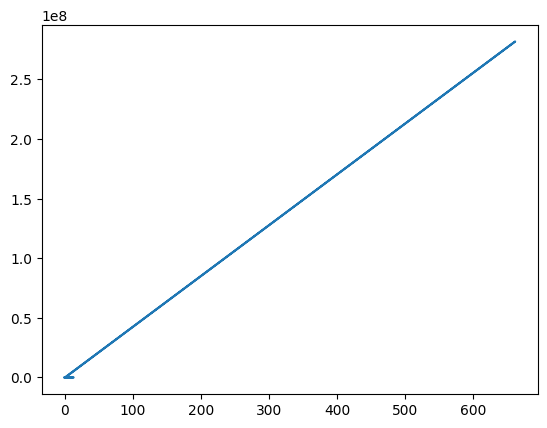

In [6]:
plt.plot(a['IFR'], a['M2R'])

## 1.2 Capital Controls Variables

In [7]:
CapConVar = pd.read_excel('/content/drive/MyDrive/Capital Controls and Banking Crises/F_CC.xlsx', 'kai and kao(self)')

In [8]:
CapConVar = CapConVar.iloc[:, 2:]

In [9]:
CapConVar

,eqi,eqo,dbi,dbo,fii,fio,kai,kao
0,0.0,1.0,0.0,2.0,0,0,0.000000,0.333333
1,0.0,1.0,0.0,0.0,0,0,0.777778,0.666667
2,0.0,1.0,0.0,1.0,0,0,0.500000,0.583333
3,0.0,1.0,0.0,1.5,1,0,1.000000,0.833333
4,0.0,1.0,0.0,1.5,1,0,1.000000,1.000000
...,...,...,...,...,...,...,...,...
708,0.0,0.0,0.0,0.0,0,0,0.700000,0.750000
709,0.0,0.0,0.0,0.0,0,0,0.650000,0.750000
710,0.0,0.0,0.0,0.0,0,0,0.700000,0.950000
711,0.0,0.0,0.0,0.0,0,0,0.850000,0.500000


## 1.3 Institutional Quality Variables

In [10]:
InsQuaVar = pd.read_excel('/content/drive/MyDrive/Capital Controls and Banking Crises/Institutional Quality Variables.xlsx', 'IQS')

In [11]:
InsQuaVar = pd.melt(InsQuaVar, id_vars = ['Country Name'], value_vars = [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,  2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], var_name = 'year', value_name ='INS')

In [12]:
InsQuaVar

,Country Name,year,INS
0,Argentina,1995,2.000000
1,Brazil,1995,3.000000
2,Bulgaria,1995,2.000000
3,Chile,1995,2.000000
4,China,1995,2.666667
...,...,...,...
708,Thailand,2017,2.000000
709,Turkiye,2017,2.000000
710,Ukraine,2017,1.000000
711,"Venezuela, RB",2017,1.000000


## 1.4 Banking Crises Variables (Dependent Variables) And Generate The Completed Dataframe


In [13]:
BanCriVar = pd.read_excel('/content/drive/MyDrive/Capital Controls and Banking Crises/L Banking Crises New.xlsx', 'BC 4 categories')

In [14]:
BanCriVar

,country,year,LBC,LBC_2,LBC_3,LBC_4,RBC
0,Argentina,1995,NaN,NaN,NaN,NaN,NaN
1,Brazil,1995,NaN,NaN,NaN,NaN,NaN
2,Bulgaria,1995,NaN,NaN,NaN,NaN,NaN
3,Chile,1995,NaN,NaN,NaN,NaN,NaN
4,China,1995,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
708,Thailand,2017,0.0,0.0,0.0,0.0,NaN
709,Turkey,2017,0.0,0.0,0.0,0.0,NaN
710,Ukraine,2017,0.0,0.0,0.0,0.0,NaN
711,Venezuela,2017,0.0,0.0,0.0,0.0,NaN


In [15]:
banking_crises_data = pd.concat([BanCriVar, CapConVar, InsQuaVar.drop(columns = ['Country Name', 'year']), ConVar.drop(columns = ['Country Name', 'year'])], axis = 1)

In [17]:
banking_crises_data = banking_crises_data.sort_values(by = ['country', 'year'])

In [18]:
banking_crises_data.columns

Index(['country', 'year', 'LBC', 'LBC_2', 'LBC_3', 'LBC_4', 'RBC', 'eqi',
       'eqo', 'dbi', 'dbo', 'fii', 'fio', 'kai', 'kao', 'INS', 'GDPGR',
       'GDPPC', 'IFR', 'IR', 'XM', 'M2R', 'CPGDP', 'CG', 'CPG', 'CPI'],
      dtype='object')

# 2. Explore The Variables

## 2.1 Handle with Missing Values in Explanatory Variables

#### 2.1.1 Visualize the missing values

In [19]:
### Find out the columns containing missing values

banking_crises_data.isnull().sum()

,0
country,0
year,0
LBC,31
LBC_2,76
LBC_3,31
LBC_4,52
RBC,299
eqi,0
eqo,0
dbi,0


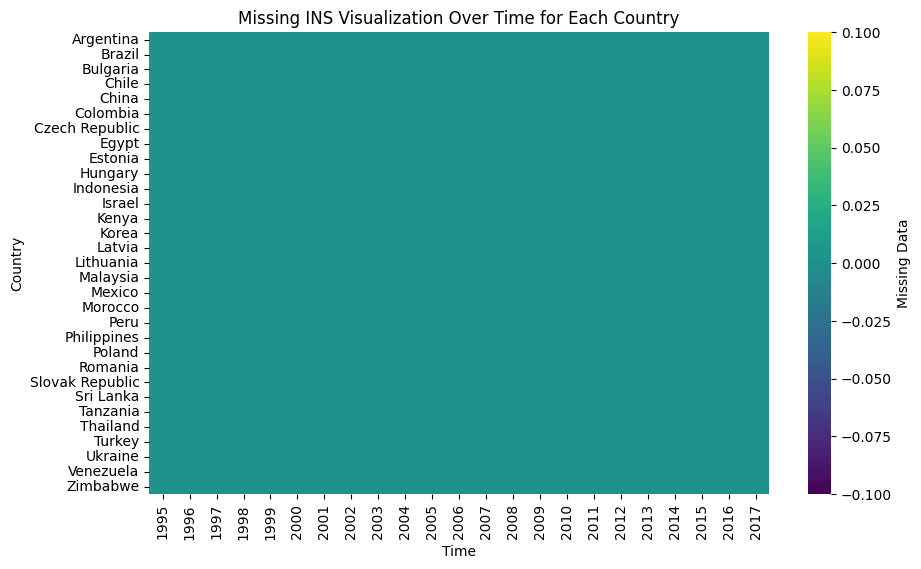

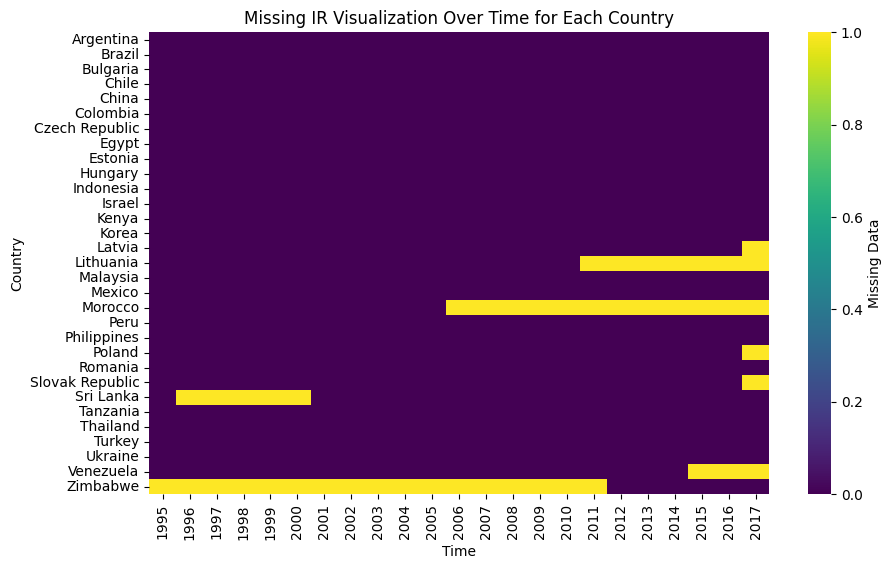

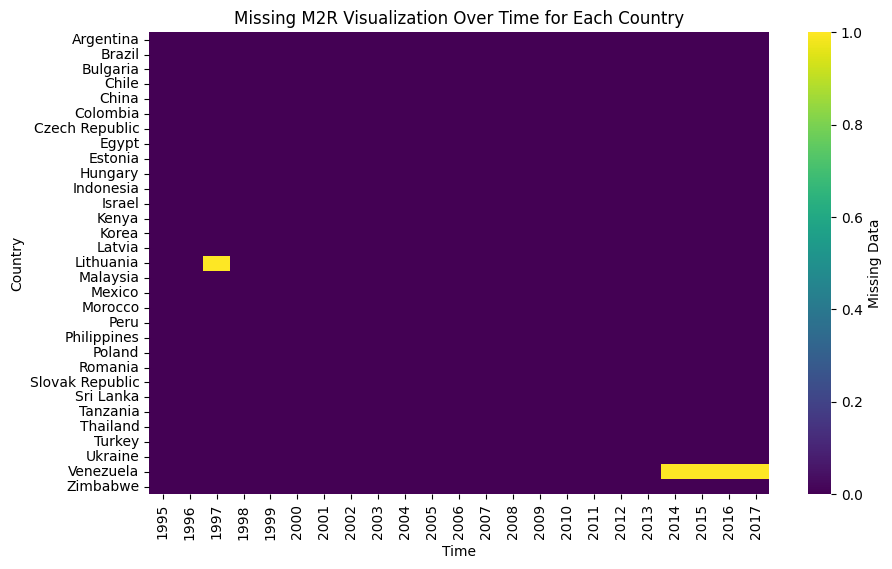

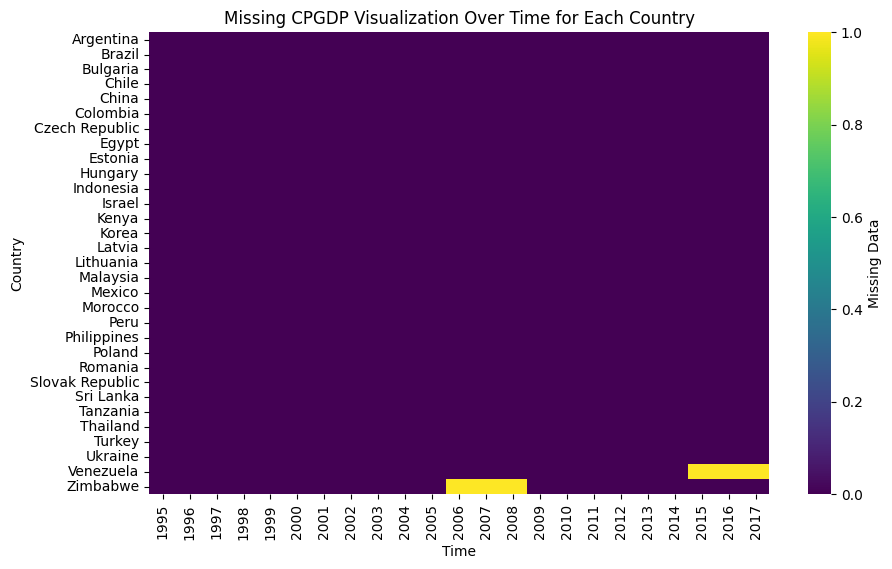

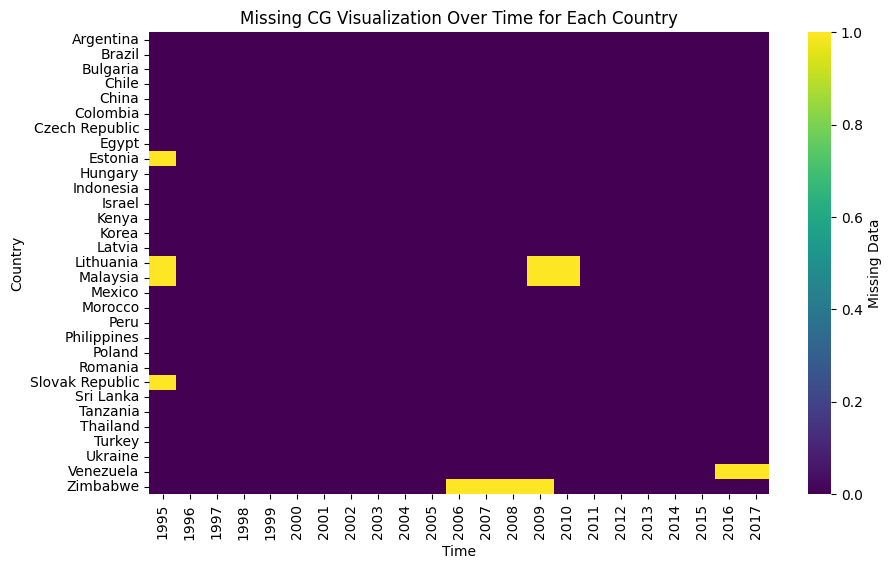

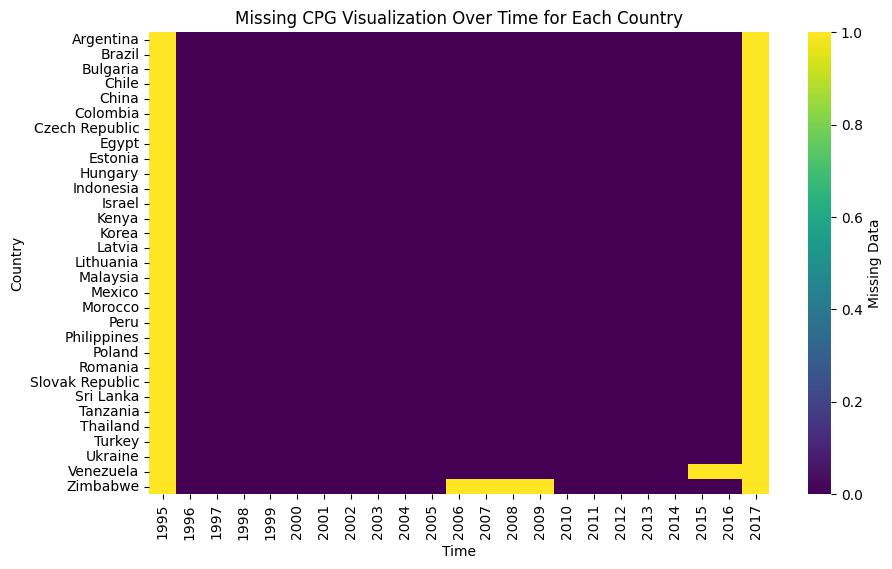

In [20]:
###  Create a dataframe indicating the missing values and set up the index for the panel data set

banking_crises_w_missingval = banking_crises_data.set_index(['country', 'year']).isnull()

### Explore the distribution of the missing values in explanatory variables across the countries and time periods by using heatmap

expVar_missvalues = ['INS', 'IR', 'M2R', 'CPGDP', 'CG', 'CPG']

for i in expVar_missvalues:
  missing_heatmap_data = banking_crises_w_missingval[i].unstack(level=-1)
  plt.figure(figsize=(10, 6))
  sns.heatmap(missing_heatmap_data, cmap="viridis", cbar_kws={'label': 'Missing Data'})
  plt.title(f'Missing {i} Visualization Over Time for Each Country')
  plt.xlabel('Time')
  plt.ylabel('Country')
  plt.show()

#### 2.1.2 Use forward and backward imputation for filling the missing values

In [21]:
banking_crises = banking_crises_data.copy()
banking_crises.set_index(['country', 'year'], inplace=True)

### Forward and backward imputation

expVar_missvalues = ['INS', 'IR', 'M2R', 'CPGDP', 'CG', 'CPG']
for i in expVar_missvalues:
  banking_crises[i] = banking_crises.groupby('country')[i].ffill()
  banking_crises[i] = banking_crises.groupby('country')[i].bfill()



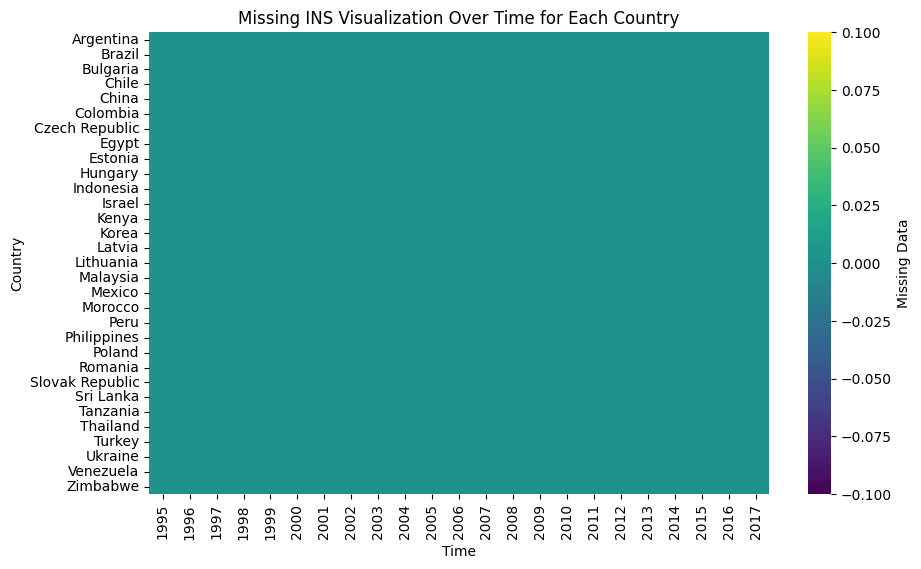

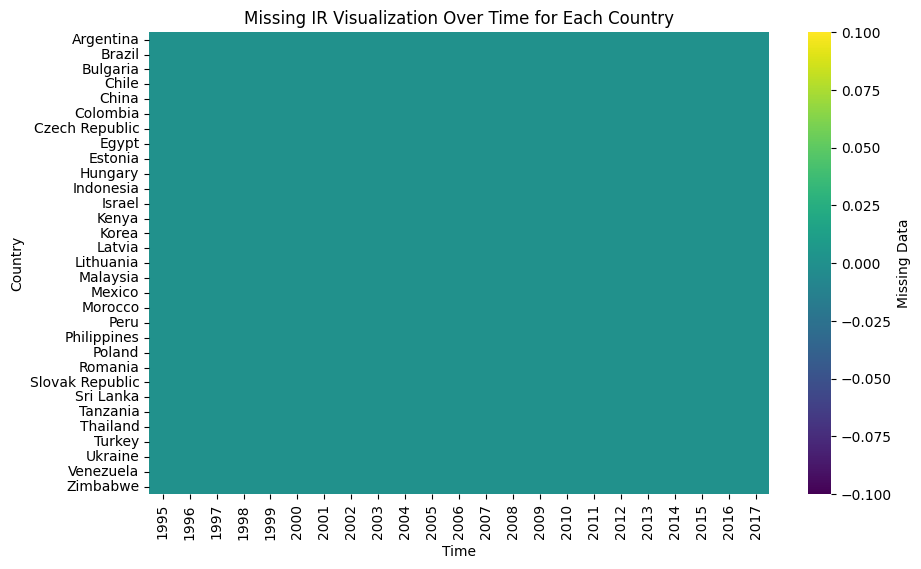

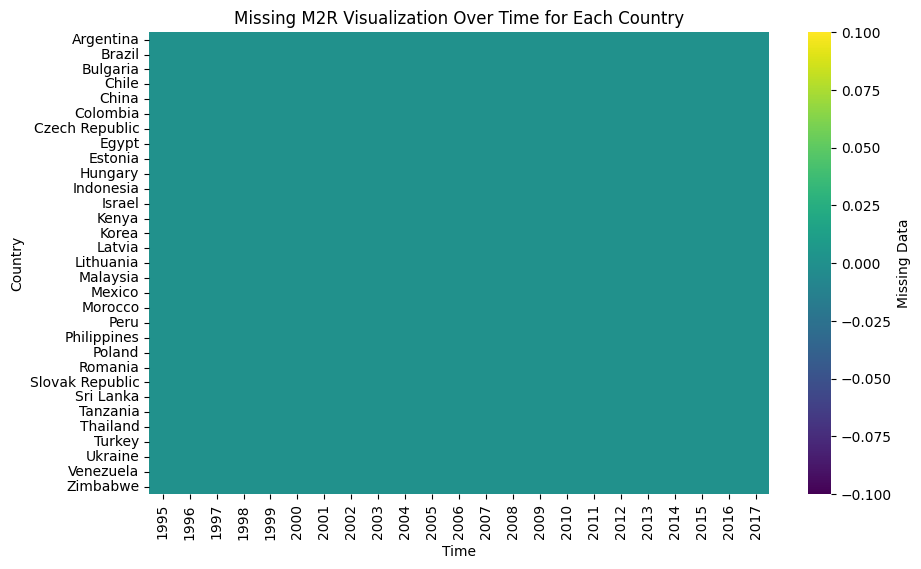

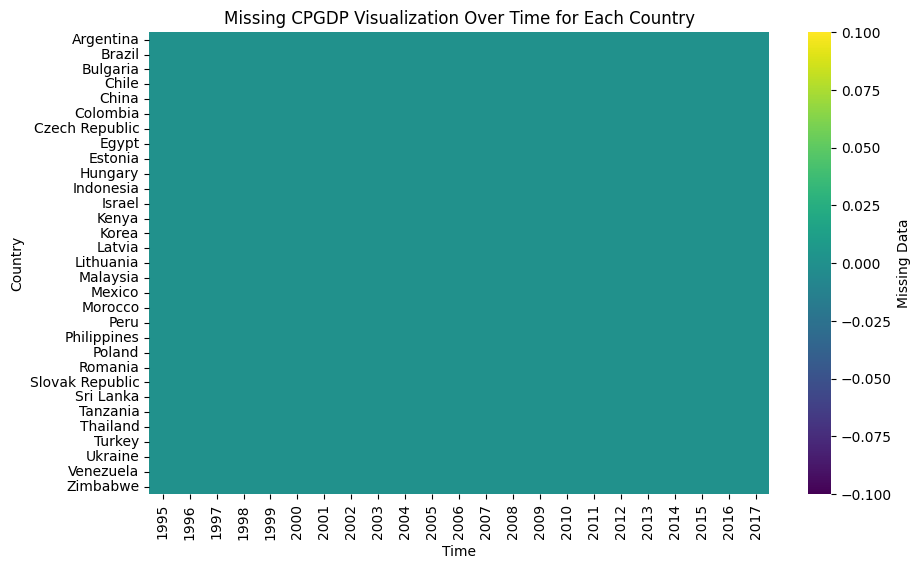

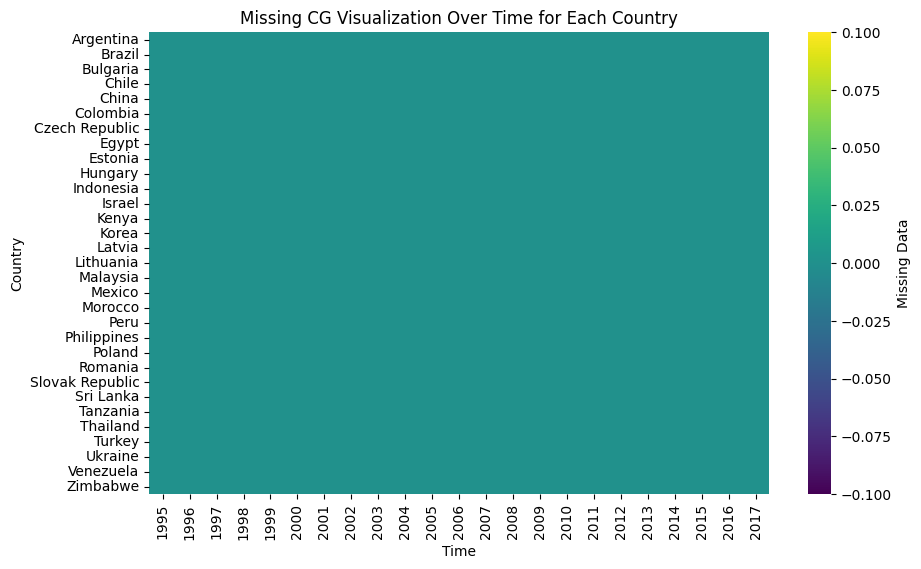

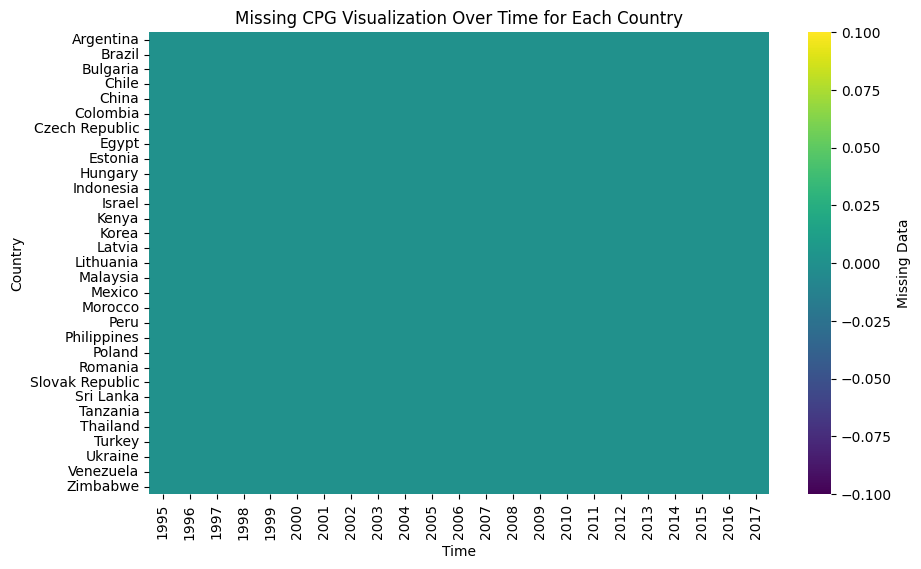

In [ ]:
### Double Check if we still have missing values in the explanatory varialbes

banking_crises_no_missingVal = banking_crises.isnull()

for i in expVar_missvalues:
  missing_heatmap_data = banking_crises_no_missingVal[i].unstack(level=-1)
  plt.figure(figsize=(10, 6))
  sns.heatmap(missing_heatmap_data, cmap="viridis", cbar_kws={'label': 'Missing Data'})
  plt.title(f'Missing {i} Visualization Over Time for Each Country')
  plt.xlabel('Time')
  plt.ylabel('Country')
  plt.show()

## 2.2 Explore the distribution of institutional quality

In [22]:
banking_crises

LBC  LBC_2  LBC_3  LBC_4  RBC  eqi  eqo  dbi  dbo  fii  ...  \
country   year                                                          ...   
Argentina 1995  NaN    NaN    NaN    NaN  NaN  0.0  1.0  0.0  2.0    0  ...   
          1996  0.0    NaN    1.0    NaN  1.0  1.0  1.0  0.0  2.5    1  ...   
          1997  0.0    NaN    1.0    0.0  0.0  0.0  0.0  1.0  0.0    0  ...   
          1998  0.0    0.0    0.0    0.0  0.0  2.0  2.0  6.0  6.0    1  ...   
          1999  0.0    0.0    0.0    0.0  0.0  2.0  1.0  5.0  3.0    1  ...   
...             ...    ...    ...    ...  ...  ...  ...  ...  ...  ...  ...   
Zimbabwe  2013  0.0    0.0    0.0    0.0  0.0  2.0  2.0  6.0  7.0    1  ...   
          2014  0.0    0.0    0.0    0.0  0.0  1.0  2.0  5.0  5.5    1  ...   
          2015  0.0    0.0    0.0    0.0  NaN  1.5  2.0  3.0  7.0    1  ...   
          2016  0.0    0.0    0.0    0.0  NaN  1.5  1.0  5.5  2.5    1  ...   
          2017  0.0    0.0    0.0    0.0  NaN  0.0  0.0  0.0  0.0    0  ...   

                   GDPGR         GDPPC       IFR         IR         XM  \
country   year                                                           
Argentina 1995 -2.845210  10003.091689  0.036091  14.230000  -1.983460   
          1996  5.526690  10430.682493  0.000544  10.570000  -2.487593   
          1997  8.111047  11146.721034  0.003279   9.750000  -4.144680   
          1998  3.850179  11445.564938  0.006644  12.550000  -4.844316   
          1999 -3.385457  10935.644595 -0.018172  13.120000  -4.212295   
...                  ...           ...       ...        ...        ...   
Zimbabwe  2013  1.989493   1435.062663  0.016350   1.525435 -13.874382   
          2014  2.376929   1443.617777 -0.001978   8.787605 -11.971153   
          2015  1.779873   1445.069702 -0.024310   8.144428  -7.998095   
          2016  0.755869   1433.608776 -0.015437   4.998563  -3.394138   
          2017  4.709492   1479.376056  0.008940   3.742846  -1.542184   

                      M2R      CPGDP        CG       CPG         CPI  
country   year                                                        
Argentina 1995   3.252356  19.679623 -0.319970  0.196420   38.801600  
          1996   3.131601  19.876043  0.226394  0.196420   38.822700  
          1997   3.456932  21.556936  1.746457  1.680893   38.950000  
          1998   3.445913  23.590991  2.219840  2.034055   39.208800  
          1999   3.383283  24.136101  0.740045  0.545110   38.496300  
...                   ...        ...       ...       ...         ...  
Zimbabwe  2013   8.185757  18.713554 -1.408708 -1.368733  109.075219  
          2014  12.030612  19.187374  0.478459  0.473820  108.859485  
          2015  10.898046  18.044351 -0.894686 -1.143022  106.213145  
          2016  13.846696  17.018645 -1.217123 -1.025707  104.573565  
          2017  21.313759  16.758158 -0.223454 -1.025707  105.508414  

[713 rows x 24 columns]

In [23]:
### Choose LBC_2 as Our Dependent Variable : In this case, we drop the following 2 banking crisis observations after the break out of the banking crisis to avoid reverse causality.

df_LBC2 = banking_crises.drop(columns = ['LBC', 'LBC_3', 'LBC_4', 'RBC'])
df_LBC2.dropna(inplace=True)

df_LBC2.reset_index(inplace=True)

bp = df_LBC2[['country', 'year', 'INS']]


In [ ]:
bp[bp['country'] == 'Korea']

,country,year,INS
269,Korea,1996,3.500000
270,Korea,1997,3.291667
271,Korea,2000,3.000000
272,Korea,2001,3.000000
273,Korea,2002,3.000000
274,Korea,2003,3.000000
275,Korea,2004,3.000000
276,Korea,2005,3.000000
277,Korea,2006,3.000000
278,Korea,2007,3.000000


In [ ]:
bp_mean = bp[['year', 'INS']].groupby('year').mean()

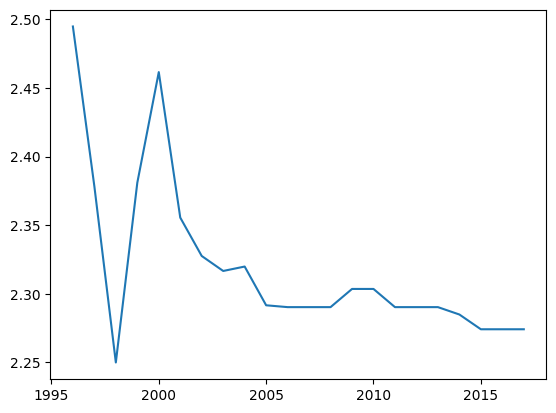

In [ ]:
plt.plot(bp_mean)

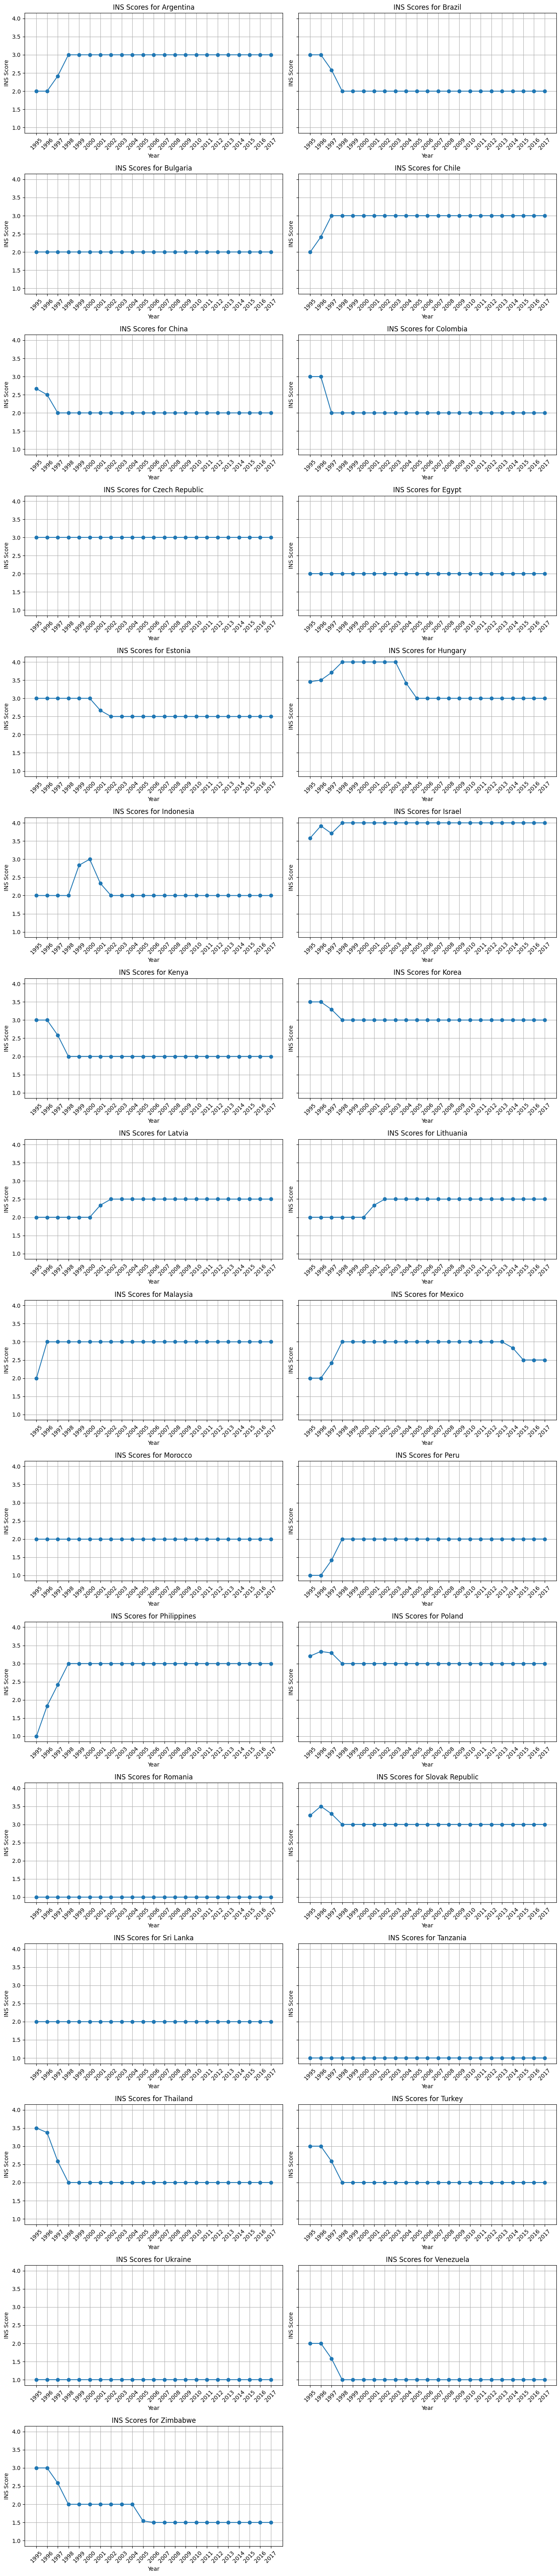

In [ ]:
countries = bp['country'].unique()

# Number of rows and columns for the subplot grid
n_rows = (len(countries) + 1) // 2  # Adjust as necessary based on how many plots you want per row
n_cols = 2

# Create a figure and axes with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows), sharey=True)

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Loop over the countries and create a plot for each
for i, country in enumerate(countries):
    # Filter data for the country
    df_country = df[df['country'] == country]

    # Plotting
    axs[i].plot(df_country['year'], df_country['INS'], marker='o', linestyle='-')
    axs[i].set_title(f'INS Scores for {country}')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('INS Score')
    axs[i].set_xticks(df_country['year'].unique())
    axs[i].set_xticklabels(df_country['year'].unique(), rotation=45)
    axs[i].grid(True)

# Hide any unused axes
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

## 2.3  Dealing with Outliers

In [ ]:
### Choose LBC_2 as Our Dependent Variable : In this case, we drop the following 2 banking crisis observations after the break out of the banking crisis to avoid reverse causality.

df_LBC2 = df_nomissing.drop(columns = ['LBC', 'LBC_3', 'LBC_4', 'RBC'])
df_LBC2.dropna(inplace=True)

df_LBC2.reset_index(inplace=True)

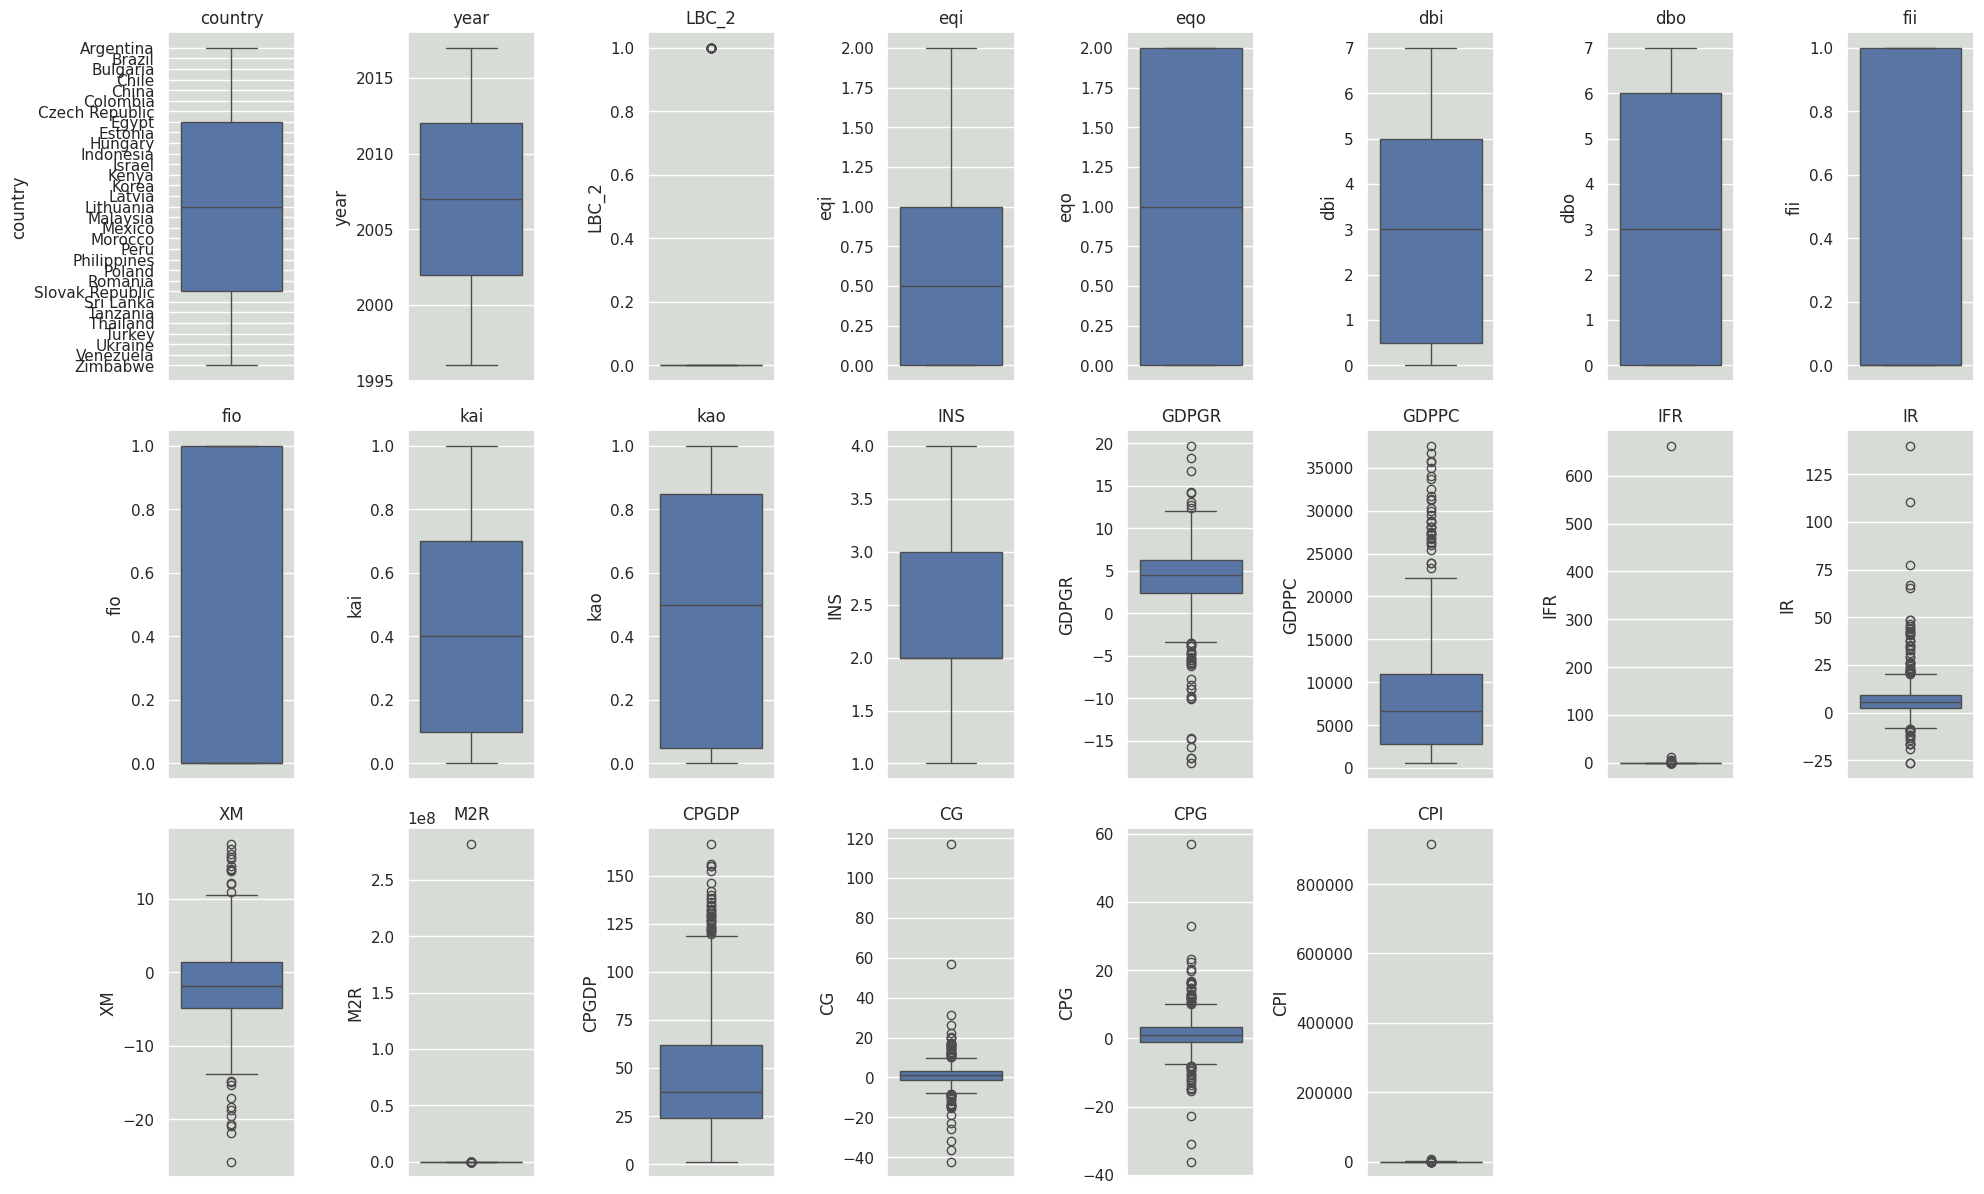

In [ ]:
### Use boxplot to visualize the distribution of each explanatory variables

sns.set_style("white", {"grid.color": ".9", "grid.linestyle": ":"})
sns.set(rc = {'axes.facecolor': '#d8dcd6'})

plt.figure(figsize = (20,20))

for i in enumerate(df_LBC2):
  plt.subplot(5,8,i[0]+1)
  sns.boxplot(y=df_LBC2[i[1]])
  plt.title(i[1])

plt.tight_layout()

In [ ]:
df_LBC2

,country,year,LBC_2,eqi,eqo,dbi,dbo,fii,fio,kai,...,GDPGR,GDPPC,IFR,IR,XM,M2R,CPGDP,CG,CPG,CPI
0,Argentina,1998,0.0,2.0,2.0,6.0,6.0,1,1,0.10,...,3.850179,11445.564938,0.006644,12.550000,-4.844316,3.445913,23.590991,2.219840,2.034055,39.208800
1,Argentina,1999,0.0,2.0,1.0,5.0,3.0,1,0,0.10,...,-3.385457,10935.644595,-0.018172,13.120000,-4.212295,3.383283,24.136101,0.740045,0.545110,38.496300
2,Argentina,2000,0.0,0.0,0.5,0.0,0.5,0,0,0.10,...,-0.788999,10730.608217,-0.007312,9.950000,-3.159922,3.598702,23.167422,-0.998610,-0.968678,38.214800
3,Argentina,2001,1.0,0.0,0.0,0.0,0.0,0,0,0.25,...,-4.408840,10146.106818,-0.015434,29.120000,-1.406948,5.009929,20.156033,-3.061159,-3.011390,37.625000
4,Argentina,2004,0.0,1.5,1.0,3.0,1.5,0,0,0.55,...,9.029573,10389.151274,0.061010,-9.790000,1.950583,2.372400,9.501285,-1.080188,-1.119897,58.326500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,Zimbabwe,2013,0.0,2.0,2.0,6.0,7.0,1,1,0.00,...,1.989493,1435.062663,0.016350,1.525435,-13.874382,8.185757,18.713554,-1.408708,-1.368733,109.075219
633,Zimbabwe,2014,0.0,1.0,2.0,5.0,5.5,1,0,0.00,...,2.376929,1443.617777,-0.001978,8.787605,-11.971153,12.030612,19.187374,0.478459,0.473820,108.859485
634,Zimbabwe,2015,0.0,1.5,2.0,3.0,7.0,1,1,0.00,...,1.779873,1445.069702,-0.024310,8.144428,-7.998095,10.898046,18.044351,-0.894686,-1.143022,106.213145
635,Zimbabwe,2016,0.0,1.5,1.0,5.5,2.5,1,0,0.00,...,0.755869,1433.608776,-0.015437,4.998563,-3.394138,13.846696,17.018645,-1.217123,-1.025707,104.573565


In [ ]:
var_outliers = ['IFR', 'IR', 'M2R', 'CG', 'CPG', 'CPI']

for i in var_outliers:
  mean = df_LBC2[i].mean()
  std = df_LBC2[i].std()
  df_LBC2 = df_LBC2[(df_LBC2[i] >= mean - 3 * std) & (df_LBC2[i] <= mean + 3 * std)]

In [ ]:
df_LBC2

,country,year,LBC_2,eqi,eqo,dbi,dbo,fii,fio,kai,...,GDPGR,GDPPC,IFR,IR,XM,M2R,CPGDP,CG,CPG,CPI
0,Argentina,1998,0.0,2.0,2.0,6.0,6.0,1,1,0.10,...,3.850179,11445.564938,0.006644,12.550000,-4.844316,3.445913,23.590991,2.219840,2.034055,39.208800
1,Argentina,1999,0.0,2.0,1.0,5.0,3.0,1,0,0.10,...,-3.385457,10935.644595,-0.018172,13.120000,-4.212295,3.383283,24.136101,0.740045,0.545110,38.496300
2,Argentina,2000,0.0,0.0,0.5,0.0,0.5,0,0,0.10,...,-0.788999,10730.608217,-0.007312,9.950000,-3.159922,3.598702,23.167422,-0.998610,-0.968678,38.214800
3,Argentina,2001,1.0,0.0,0.0,0.0,0.0,0,0,0.25,...,-4.408840,10146.106818,-0.015434,29.120000,-1.406948,5.009929,20.156033,-3.061159,-3.011390,37.625000
4,Argentina,2004,0.0,1.5,1.0,3.0,1.5,0,0,0.55,...,9.029573,10389.151274,0.061010,-9.790000,1.950583,2.372400,9.501285,-1.080188,-1.119897,58.326500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,Zimbabwe,2013,0.0,2.0,2.0,6.0,7.0,1,1,0.00,...,1.989493,1435.062663,0.016350,1.525435,-13.874382,8.185757,18.713554,-1.408708,-1.368733,109.075219
633,Zimbabwe,2014,0.0,1.0,2.0,5.0,5.5,1,0,0.00,...,2.376929,1443.617777,-0.001978,8.787605,-11.971153,12.030612,19.187374,0.478459,0.473820,108.859485
634,Zimbabwe,2015,0.0,1.5,2.0,3.0,7.0,1,1,0.00,...,1.779873,1445.069702,-0.024310,8.144428,-7.998095,10.898046,18.044351,-0.894686,-1.143022,106.213145
635,Zimbabwe,2016,0.0,1.5,1.0,5.5,2.5,1,0,0.00,...,0.755869,1433.608776,-0.015437,4.998563,-3.394138,13.846696,17.018645,-1.217123,-1.025707,104.573565


## 2.4 Dealing with Dependent Varialbe : Resample The Imbalanced Dataset

In [24]:
### We decide to use logistic regression model, which fit the our dataset as pooled data, we use SMOTE technique to upsample the minority class.


IndepVars = ['eqi',
       'eqo', 'dbi', 'dbo', 'fii', 'fio', 'kai', 'kao', 'INS', 'GDPGR',
       'GDPPC', 'IFR', 'IR', 'XM', 'M2R', 'CPGDP', 'CG', 'CPG', 'CPI']

### We first calculate the lag values for each explanatory variable to avoid reverse causality

for i in IndepVars:
  df_LBC2[f'lag_{i}'] = df_LBC2.groupby('country')[i].shift(1)
df_LBC2.dropna(inplace=True)

In [ ]:
df_LBC2

,country,year,LBC_2,eqi,eqo,dbi,dbo,fii,fio,kai,...,lag_GDPGR,lag_GDPPC,lag_IFR,lag_IR,lag_XM,lag_M2R,lag_CPGDP,lag_CG,lag_CPG,lag_CPI
1,Argentina,1999,0.0,2.0,1.0,5.0,3.0,1,0,0.10,...,3.850179,11445.564938,0.006644,12.550000,-4.844316,3.445913,23.590991,2.219840,2.034055,39.208800
2,Argentina,2000,0.0,0.0,0.5,0.0,0.5,0,0,0.10,...,-3.385457,10935.644595,-0.018172,13.120000,-4.212295,3.383283,24.136101,0.740045,0.545110,38.496300
3,Argentina,2001,1.0,0.0,0.0,0.0,0.0,0,0,0.25,...,-0.788999,10730.608217,-0.007312,9.950000,-3.159922,3.598702,23.167422,-0.998610,-0.968678,38.214800
4,Argentina,2004,0.0,1.5,1.0,3.0,1.5,0,0,0.55,...,-4.408840,10146.106818,-0.015434,29.120000,-1.406948,5.009929,20.156033,-3.061159,-3.011390,37.625000
5,Argentina,2005,0.0,0.0,0.5,0.5,1.0,1,1,0.40,...,9.029573,10389.151274,0.061010,-9.790000,1.950583,2.372400,9.501285,-1.080188,-1.119897,58.326500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,Zimbabwe,2013,0.0,2.0,2.0,6.0,7.0,1,1,0.00,...,16.665429,1432.305854,0.037253,6.428554,-13.307622,6.461140,20.082287,1.157384,1.197801,107.320581
633,Zimbabwe,2014,0.0,1.0,2.0,5.0,5.5,1,0,0.00,...,1.989493,1435.062663,0.016350,1.525435,-13.874382,8.185757,18.713554,-1.408708,-1.368733,109.075219
634,Zimbabwe,2015,0.0,1.5,2.0,3.0,7.0,1,1,0.00,...,2.376929,1443.617777,-0.001978,8.787605,-11.971153,12.030612,19.187374,0.478459,0.473820,108.859485
635,Zimbabwe,2016,0.0,1.5,1.0,5.5,2.5,1,0,0.00,...,1.779873,1445.069702,-0.024310,8.144428,-7.998095,10.898046,18.044351,-0.894686,-1.143022,106.213145


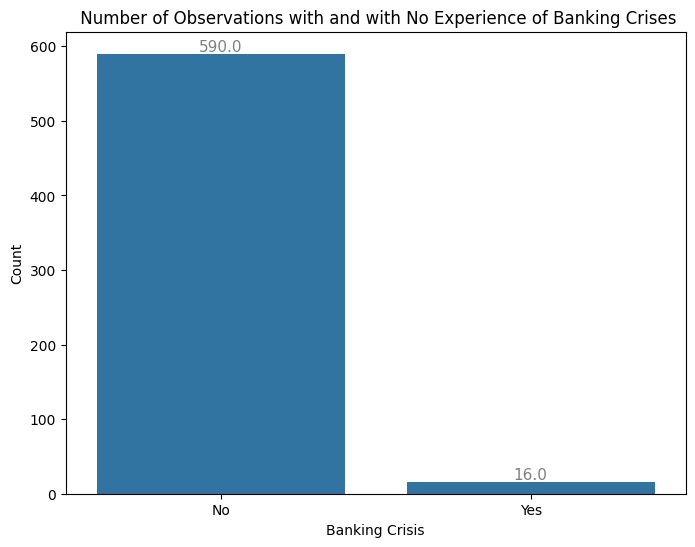

In [25]:
### Calculate and visualize the proportion of observations with experience of banking crises

plt.figure(figsize=(8, 6))
ax = sns.countplot(x = df_LBC2['LBC_2'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                textcoords='offset points')
plt.title(' Number of Observations with and with No Experience of Banking Crises')
plt.xlabel('Banking Crisis')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [26]:
### We use smote tech to upsample the minority class

smote = SMOTE(sampling_strategy = 'minority', random_state = 101)
X = df_LBC2.drop(columns = ['LBC_2', 'country', 'year'])
y = df_LBC2['LBC_2']
X_res, y_res = smote.fit_resample(X, y)
df_LBC2_res = pd.concat([X_res, y_res], axis = 1)

In [27]:
len(df_LBC2_res.columns)

39

In [28]:
### Create the interaction terms between capital controls and institutional quality

'''cc_var = ['eqi', 'eqo', 'dbi', 'dbo', 'fii', 'fio', 'kai', 'kao']
df_LBC2['lag_INS_centered'] = df_LBC2['INS'] - df_LBC2['INS'].mean()
for i in cc_var:
  df_LBC2[f'lag_{i} x lag_INS'] = (df_LBC2[f'lag_{i}'] - df_LBC2[f'lag_{i}'].mean()) * df_LBC2['lag_INS_centered']'''

cc_var = ['eqi', 'eqo', 'dbi', 'dbo', 'fii', 'fio', 'kai', 'kao']
df_LBC2_res['lag_INS_centered'] = df_LBC2_res['INS'] - df_LBC2_res['INS'].mean()
for i in cc_var:
  df_LBC2_res[f'lag_{i} x lag_INS'] = df_LBC2_res[f'lag_{i}']  * df_LBC2_res['lag_INS']

In [29]:
df_LBC2_res.columns

Index(['eqi', 'eqo', 'dbi', 'dbo', 'fii', 'fio', 'kai', 'kao', 'INS', 'GDPGR',
       'GDPPC', 'IFR', 'IR', 'XM', 'M2R', 'CPGDP', 'CG', 'CPG', 'CPI',
       'lag_eqi', 'lag_eqo', 'lag_dbi', 'lag_dbo', 'lag_fii', 'lag_fio',
       'lag_kai', 'lag_kao', 'lag_INS', 'lag_GDPGR', 'lag_GDPPC', 'lag_IFR',
       'lag_IR', 'lag_XM', 'lag_M2R', 'lag_CPGDP', 'lag_CG', 'lag_CPG',
       'lag_CPI', 'LBC_2', 'lag_INS_centered', 'lag_eqi x lag_INS',
       'lag_eqo x lag_INS', 'lag_dbi x lag_INS', 'lag_dbo x lag_INS',
       'lag_fii x lag_INS', 'lag_fio x lag_INS', 'lag_kai x lag_INS',
       'lag_kao x lag_INS'],
      dtype='object')

In [30]:
### The final dataframe

df_LBC2_res = df_LBC2_res[['LBC_2', 'lag_eqi', 'lag_eqo', 'lag_dbi', 'lag_dbo', 'lag_fii', 'lag_fio',
       'lag_kai', 'lag_kao', 'lag_INS', 'lag_GDPGR', 'lag_GDPPC', 'lag_IFR',
       'lag_IR', 'lag_XM', 'lag_M2R', 'lag_CPGDP', 'lag_CG', 'lag_CPG',
       'lag_CPI', 'lag_eqi x lag_INS', 'lag_eqo x lag_INS', 'lag_dbi x lag_INS', 'lag_dbo x lag_INS', 'lag_fii x lag_INS', 'lag_fio x lag_INS', 'lag_kai x lag_INS', 'lag_kao x lag_INS' ]]

In [31]:
df_LBC2_res

,LBC_2,lag_eqi,lag_eqo,lag_dbi,lag_dbo,lag_fii,lag_fio,lag_kai,lag_kao,lag_INS,...,lag_CPG,lag_CPI,lag_eqi x lag_INS,lag_eqo x lag_INS,lag_dbi x lag_INS,lag_dbo x lag_INS,lag_fii x lag_INS,lag_fio x lag_INS,lag_kai x lag_INS,lag_kao x lag_INS
0,0.0,2.000000,2.000000,6.000000,6.000000,1.000000,1.000000,0.100000,0.250000,3.000000,...,2.034055,39.208800,6.000000,6.000000,18.000000,18.000000,3.000000,3.000000,0.300000,0.750000
1,0.0,2.000000,1.000000,5.000000,3.000000,1.000000,0.000000,0.100000,0.250000,3.000000,...,0.545110,38.496300,6.000000,3.000000,15.000000,9.000000,3.000000,0.000000,0.300000,0.750000
2,1.0,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.100000,0.250000,3.000000,...,-0.968678,38.214800,0.000000,1.500000,0.000000,1.500000,0.000000,0.000000,0.300000,0.750000
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.300000,3.000000,...,-3.011390,37.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.900000
4,0.0,1.500000,1.000000,3.000000,1.500000,0.000000,0.000000,0.550000,1.000000,3.000000,...,-1.119897,58.326500,4.500000,3.000000,9.000000,4.500000,0.000000,0.000000,1.650000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,1.0,0.269464,0.904195,1.616782,2.116782,0.269464,0.269464,0.100000,0.182634,2.865268,...,-0.386185,50.717488,0.772085,2.590762,4.632513,6.065147,0.772085,0.772085,0.286527,0.523296
1176,1.0,0.065478,0.130957,1.130957,0.261913,0.065478,0.065478,0.874338,0.726355,2.000000,...,1.204305,39.224435,0.130957,0.261913,2.261913,0.523827,0.130957,0.130957,1.748676,1.452710
1177,1.0,0.325764,0.488646,1.977291,0.977291,0.325764,0.000000,0.778491,0.815153,1.674236,...,5.043836,47.835642,0.545405,0.818108,3.310453,1.636216,0.545405,0.000000,1.303378,1.364758
1178,1.0,0.966771,1.483385,3.416927,4.675234,0.483385,0.483385,0.782477,0.918429,1.000000,...,2.797499,62.705976,0.966771,1.483385,3.416927,4.675234,0.483385,0.483385,0.782477,0.918429


In [32]:
df_LBC2.reset_index(inplace=True)

X = df_LBC2_res[['lag_GDPGR', 'lag_GDPPC', 'lag_IFR',
       'lag_IR', 'lag_XM', 'lag_M2R', 'lag_CPGDP', 'lag_CG', 'lag_CPG',
       'lag_CPI']]
y = df_LBC2_res['LBC_2']


scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

df_LBC2_scaled = pd.concat([df_LBC2_res[['lag_eqi', 'lag_eqo', 'lag_dbi', 'lag_dbo', 'lag_fii', 'lag_fio',
       'lag_kai', 'lag_kao', 'lag_INS', 'lag_eqi x lag_INS', 'lag_eqo x lag_INS', 'lag_dbi x lag_INS', 'lag_dbo x lag_INS', 'lag_fii x lag_INS', 'lag_fio x lag_INS', 'lag_kai x lag_INS', 'lag_kao x lag_INS' ]], pd.DataFrame(X_scaled, columns = X.columns), y], axis = 1)

df_LBC2_scaled


,lag_eqi,lag_eqo,lag_dbi,lag_dbo,lag_fii,lag_fio,lag_kai,lag_kao,lag_INS,lag_eqi x lag_INS,...,lag_GDPPC,lag_IFR,lag_IR,lag_XM,lag_M2R,lag_CPGDP,lag_CG,lag_CPG,lag_CPI,LBC_2
0,2.000000,2.000000,6.000000,6.000000,1.000000,1.000000,0.100000,0.250000,3.000000,6.000000,...,0.845348,-0.037436,0.138664,-0.313818,-0.029124,-0.875062,-0.001644,-0.227405,-0.030386,0.0
1,2.000000,1.000000,5.000000,3.000000,1.000000,0.000000,0.100000,0.250000,3.000000,6.000000,...,0.755147,-0.038724,0.169542,-0.183561,-0.029124,-0.858005,-0.235750,-0.494898,-0.030412,0.0
2,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.100000,0.250000,3.000000,0.000000,...,0.718878,-0.038160,-0.002186,0.033328,-0.029124,-0.888316,-0.510807,-0.766855,-0.030423,1.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.300000,3.000000,0.000000,...,0.615485,-0.038581,1.036309,0.394608,-0.029123,-0.982548,-0.837105,-1.133834,-0.030445,0.0
4,1.500000,1.000000,3.000000,1.500000,0.000000,0.000000,0.550000,1.000000,3.000000,4.500000,...,0.658477,-0.034614,-1.071560,1.086580,-0.029124,-1.315952,-0.523713,-0.794022,-0.029668,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,0.269464,0.904195,1.616782,2.116782,0.269464,0.269464,0.100000,0.182634,2.865268,0.772085,...,0.835928,-0.036646,-0.259688,-0.940503,-0.029124,-0.387715,-0.486610,-0.662208,-0.029954,1.0
1176,0.065478,0.130957,1.130957,0.261913,0.065478,0.065478,0.874338,0.726355,2.000000,0.130957,...,-0.461613,-0.028555,0.224178,-0.399308,-0.029124,-0.436124,-0.162361,-0.376472,-0.030385,1.0
1177,0.325764,0.488646,1.977291,0.977291,0.325764,0.000000,0.778491,0.815153,1.674236,0.545405,...,-0.532985,-0.029150,-0.142299,-0.301639,-0.029124,-0.277209,0.481653,0.313312,-0.030062,1.0
1178,0.966771,1.483385,3.416927,4.675234,0.483385,0.483385,0.782477,0.918429,1.000000,0.966771,...,-0.846711,-0.033567,0.504392,-0.462682,-0.029124,-0.719896,0.018298,-0.090250,-0.029504,1.0


In [41]:
corr_matrix_partialscaled_X = df_LBC2_scaled.corr()

In [42]:
threshold = 0.8  # Set the threshold
high_corr = ((corr_matrix_partialscaled_X.abs() >= threshold) & (corr_matrix_partialscaled_X.abs() < 1.0))

In [47]:
# Filter and find features with high correlation
high_corr_pairs = [(i, j) for i in high_corr.columns for j in high_corr.index if high_corr.loc[i, j]]
print("Highly correlated pairs (above threshold of {}):".format(threshold))
for pair in high_corr_pairs:
    print(pair, "with correlation", corr_matrix_partialscaled_X.loc[pair[0], pair[1]])

Highly correlated pairs (above threshold of 0.8):
('lag_eqi', 'lag_dbi') with correlation 0.8483254135456978
('lag_eqi', 'lag_eqi x lag_INS') with correlation 0.8913749745827139
('lag_eqo', 'lag_dbo') with correlation 0.8768172290585988
('lag_eqo', 'lag_eqo x lag_INS') with correlation 0.8536015963439029
('lag_dbi', 'lag_eqi') with correlation 0.8483254135456978
('lag_dbi', 'lag_dbo') with correlation 0.8696710330195001
('lag_dbi', 'lag_dbi x lag_INS') with correlation 0.8580080365019649
('lag_dbo', 'lag_eqo') with correlation 0.8768172290585988
('lag_dbo', 'lag_dbi') with correlation 0.8696710330195001
('lag_dbo', 'lag_dbo x lag_INS') with correlation 0.862963340914304
('lag_fii', 'lag_fii x lag_INS') with correlation 0.8986916918248316
('lag_fio', 'lag_fio x lag_INS') with correlation 0.9222313057696253
('lag_kai', 'lag_kao') with correlation 0.8712799664671169
('lag_kai', 'lag_kai x lag_INS') with correlation 0.8140402484209212
('lag_kao', 'lag_kai') with correlation 0.8712799664671

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [35]:
df_LBC2_res.columns

Index(['LBC_2', 'lag_eqi', 'lag_eqo', 'lag_dbi', 'lag_dbo', 'lag_fii',
       'lag_fio', 'lag_kai', 'lag_kao', 'lag_INS', 'lag_GDPGR', 'lag_GDPPC',
       'lag_IFR', 'lag_IR', 'lag_XM', 'lag_M2R', 'lag_CPGDP', 'lag_CG',
       'lag_CPG', 'lag_CPI', 'lag_eqi x lag_INS', 'lag_eqo x lag_INS',
       'lag_dbi x lag_INS', 'lag_dbo x lag_INS', 'lag_fii x lag_INS',
       'lag_fio x lag_INS', 'lag_kai x lag_INS', 'lag_kao x lag_INS'],
      dtype='object')

In [36]:
df_LBC2_res.head()

,LBC_2,lag_eqi,lag_eqo,lag_dbi,lag_dbo,lag_fii,lag_fio,lag_kai,lag_kao,lag_INS,...,lag_CPG,lag_CPI,lag_eqi x lag_INS,lag_eqo x lag_INS,lag_dbi x lag_INS,lag_dbo x lag_INS,lag_fii x lag_INS,lag_fio x lag_INS,lag_kai x lag_INS,lag_kao x lag_INS
0,0.0,2.0,2.0,6.0,6.0,1.0,1.0,0.10,0.25,3.0,...,2.034055,39.2088,6.0,6.0,18.0,18.0,3.0,3.0,0.30,0.75
1,0.0,2.0,1.0,5.0,3.0,1.0,0.0,0.10,0.25,3.0,...,0.545110,38.4963,6.0,3.0,15.0,9.0,3.0,0.0,0.30,0.75
2,1.0,0.0,0.5,0.0,0.5,0.0,0.0,0.10,0.25,3.0,...,-0.968678,38.2148,0.0,1.5,0.0,1.5,0.0,0.0,0.30,0.75
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.30,3.0,...,-3.011390,37.6250,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.90
4,0.0,1.5,1.0,3.0,1.5,0.0,0.0,0.55,1.00,3.0,...,-1.119897,58.3265,4.5,3.0,9.0,4.5,0.0,0.0,1.65,3.00


In [ ]:
df_LBC2_res.columns

Index(['LBC_2', 'lag_eqi', 'lag_eqo', 'lag_dbi', 'lag_dbo', 'lag_fii',
       'lag_fio', 'lag_kai', 'lag_kao', 'lag_INS', 'lag_GDPGR', 'lag_GDPPC',
       'lag_IFR', 'lag_IR', 'lag_XM', 'lag_M2R', 'lag_CPGDP', 'lag_CG',
       'lag_CPG', 'lag_CPI', 'lag_eqi x lag_INS', 'lag_eqo x lag_INS',
       'lag_dbi x lag_INS', 'lag_dbo x lag_INS', 'lag_fii x lag_INS',
       'lag_fio x lag_INS', 'lag_kai x lag_INS', 'lag_kao x lag_INS'],
      dtype='object')

In [ ]:
df_LBC2_scaled.columns

Index(['lag_eqi', 'lag_eqo', 'lag_dbi', 'lag_dbo', 'lag_fii', 'lag_fio',
       'lag_kai', 'lag_kao', 'lag_INS', 'lag_eqi x lag_INS',
       'lag_eqo x lag_INS', 'lag_dbi x lag_INS', 'lag_dbo x lag_INS',
       'lag_fii x lag_INS', 'lag_fio x lag_INS', 'lag_kai x lag_INS',
       'lag_kao x lag_INS', 'lag_GDPGR', 'lag_GDPPC', 'lag_IFR', 'lag_IR',
       'lag_XM', 'lag_M2R', 'lag_CPGDP', 'lag_CG', 'lag_CPG', 'lag_CPI',
       'LBC_2'],
      dtype='object')

In [81]:
model_test = logit("LBC_2 ~ lag_kai + lag_INS_low + lag_INS_mediumn + lag_GDPGR + lag_GDPPC  + lag_IR + lag_XM + lag_CPGDP + lag_CG + lag_CPG", data=df_LBC2_scaled)
result = model_test.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.436665
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  LBC_2   No. Observations:                 1180
Model:                          Logit   Df Residuals:                     1169
Method:                           MLE   Df Model:                           10
Date:                Wed, 26 Mar 2025   Pseudo R-squ.:                  0.3700
Time:                        21:18:42   Log-Likelihood:                -515.26
converged:                       True   LL-Null:                       -817.91
Covariance Type:            nonrobust   LLR p-value:                1.290e-123
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6122      0.393      4.100      0.000       0.842       2.383
lag_kai       

In [ ]:
for i in cc_var:
  X = df_LBC2_scaled[[f'lag_{i}', 'lag_INS', 'lag_GDPGR', 'lag_GDPPC',
       'lag_IR','lag_XM', 'lag_M2R', 'lag_CPGDP', 'lag_CG', 'lag_CPG', f'lag_{i} x lag_INS' ]]
  y = df_LBC2_scaled[['LBC_2']]

  model = sm.Logit(y, X)
  result = model.fit()
  print(result.summary())






Optimization terminated successfully.
         Current function value: 0.463400
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  LBC_2   No. Observations:                 1180
Model:                          Logit   Df Residuals:                     1169
Method:                           MLE   Df Model:                           10
Date:                Fri, 13 Dec 2024   Pseudo R-squ.:                  0.3315
Time:                        00:01:10   Log-Likelihood:                -546.81
converged:                       True   LL-Null:                       -817.91
Covariance Type:            nonrobust   LLR p-value:                4.175e-110
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
lag_eqi              -0.2625      0.369     -0.711      0.477      -0.986       0.461
lag_INS

<Axes: ylabel='Count'>

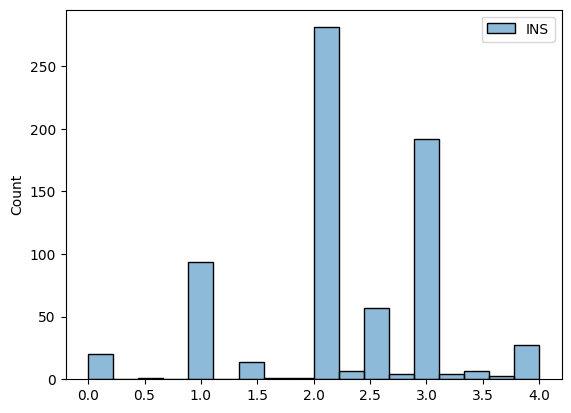

In [ ]:
df.groupby(['LBC_2'])['INS'].mean()

,INS
LBC_2,
0.0,2.227787
1.0,2.060185


In [61]:
df_LBC2_scaled['lag_INS'].unique()

array([3.        , 2.58333333, 2.        , 2.41666667, 2.5       ,
       2.66666667, 3.5       , 3.70833333, 4.        , 3.41666667,
       2.33333333, 3.91666667, 3.29166667, 2.83333333, 1.        ,
       1.41666667, 1.83333333, 3.33333333, 3.375     , 1.58333333,
       1.54166667, 1.5       , 3.36248579, 2.76730253, 1.3102228 ,
       1.62119061, 1.99493656, 2.82614039, 1.97916995, 2.95423986,
       2.39247601, 1.88466131, 1.61355535, 1.88553483, 1.03622915,
       3.06188138, 2.58505693, 2.06082484, 1.08329506, 1.31573629,
       2.47494244, 1.90709155, 1.38298295, 1.42222041, 1.69273503,
       1.62226601, 3.47687114, 3.0648506 , 1.30966597, 1.49084868,
       3.15774703, 2.94333031, 3.13757328, 1.06678629, 3.26866623,
       3.19438886, 1.74490231, 2.8032865 , 1.01921732, 1.00508184,
       3.14627822, 1.64745953, 2.74290664, 3.03394486, 2.59494881,
       2.31695182, 2.60646112, 1.5529243 , 2.76617697, 3.11177209,
       1.66961428, 3.28384193, 3.00530983, 2.29997315, 1.36544

In [67]:
def continuous_Woe(data, continuous_var, target_var):
  df1 = pd.concat([data[continuous_var], data[target_var]], axis=1)
  df2 = df1.groupby(df1.columns[0], as_index=False)[df1.columns.values[1]].count()
  df3 = df1.groupby(df1.columns[0], as_index=False)[df1.columns.values[1]].sum()
  df = pd.concat([df2, df3], axis=1)
  df = df.iloc[ : , [0, 1, 3]]
  df.columns = [df.columns.values[0], 'n_obs', 'n_bad']
  df['n_good'] = df['n_obs'] - df['n_bad']
  df['prop_bad'] = df['n_bad']/df['n_bad'].sum()
  df['prop_good'] = df['n_good']/df['n_good'].sum()
  df['woe'] = np.log(df['prop_bad']/df['prop_good'])
  df['IV'] = (df['prop_bad']-df['prop_good']) * df['woe']
  df['IV'] = df['IV'].sum()
  # df = df.sort_values('woe')
  # df = df.reset_index(drop = True)
  return df

In [68]:
df_LBC2_scaled['lag_INS_factor'] = pd.cut(df_LBC2_scaled['lag_INS'], 3)

In [69]:
continuous_Woe(df_LBC2_scaled, 'lag_INS_factor', 'LBC_2')

,lag_INS_factor,n_obs,n_bad,n_good,prop_bad,prop_good,woe,IV
0,"(0.997, 2.0]",637,315.0,322.0,0.533898,0.545763,-0.021979,0.205951
1,"(2.0, 3.0]",396,162.0,234.0,0.274576,0.396610,-0.367725,0.205951
2,"(3.0, 4.0]",147,113.0,34.0,0.191525,0.057627,1.201027,0.205951


In [79]:
df_LBC2_scaled['lag_INS_low'] = np.where((df_LBC2_scaled['lag_INS'] >= 1) & (df_LBC2_scaled['lag_INS'] <= 2), 1, 0)
df_LBC2_scaled['lag_INS_mediumn'] = np.where((df_LBC2_scaled['lag_INS'] > 2) & (df_LBC2_scaled['lag_INS'] <= 3), 1, 0)
df_LBC2_scaled['lag_INS_high'] = np.where((df_LBC2_scaled['lag_INS'] > 3) & (df_LBC2_scaled['lag_INS'] <= 4), 1, 0)

In [ ]:
()